In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense

In [2]:
np.set_printoptions(threshold=np.inf)
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
class VGG16(Model):
    def __init__(self):
        super(VGG16, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3,3), padding='same')
        self.b1 = BatchNormalization()
        self.a1 = Activation("relu")
        
        self.c2 = Conv2D(filters=64, kernel_size=(3,3), padding='same')
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        
        self.p1 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d1 = Dropout(0.2)
        
        self.c3 = Conv2D(filters=128, kernel_size=(3,3), padding='same')
        self.b3 = BatchNormalization()
        self.a3 = Activation('relu')
        self.c4 = Conv2D(filters=128, kernel_size=(3,3), padding='same')
        self.b4 = BatchNormalization()
        self.a4 = Activation('relu')
        
        self.p2 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d2 = Dropout(0.2)
        
        self.c5 = Conv2D(filters=256, kernel_size=(3,3), padding='same')
        self.b5 = BatchNormalization()
        self.a5 = Activation('relu')
        self.c6 = Conv2D(filters=256, kernel_size=(3,3), padding='same')
        self.b6 = BatchNormalization()
        self.a6 = Activation('relu')
        self.c7 = Conv2D(filters=256, kernel_size=(3,3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        
        self.p3 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d3 = Dropout(0.2)
        
        self.c8 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b8 = BatchNormalization()
        self.a8 = Activation("relu")
        self.c9 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b9 = BatchNormalization()
        self.a9 = Activation('relu')
        self.c9 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b9 = BatchNormalization()
        self.a9 = Activation("relu")
        self.c10 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        
        self.p4 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d4 = Dropout(0.2)
        
        self.c11 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b11 = BatchNormalization()
        self.a11 = Activation('relu')
        self.c12 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b12 = BatchNormalization()
        self.a12 = Activation('relu')
        self.c13 = Conv2D(filters=512, kernel_size=(3,3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        
        self.p5 = MaxPool2D(pool_size=(2,2), strides=2, padding='same')
        self.d5 = Dropout(0.2)
        
        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.d6 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.d7 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')
        
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p1(x)
        x = self.d1(x)
        
        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p2(x)
        x = self.d2(x)
        
        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p3(x)
        x = self.d3(x)
        
        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p4(x)
        x = self.d4(x)
        
        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p5(x)
        x = self.d5(x)
        
        x = self.flatten(x)
        x = self.f1(x)
        x = self.d6(x)
        x = self.f2(x)
        x = self.d7(x)
        y = self.f3(x)
        return y

In [11]:
model = VGG16()
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

model_save_path = "vgg16_checkpoint/vgg16.ckpt"
if os.path.exists(model_save_path+'.index'):
    print("-------------------load model----------------------")
    model.load_weights(model_save_path)
    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,
                                                save_weights_only=True,
                                                save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                   callbacks= [cp_callback])
model.summary()

with open('./vgg16_weights.txt','w') as f:
    for v in model.trainable_variables:
        f.write(str(v.name)+'\n')
        f.write(str(v.shape)+'\n')
        f.write(str(v.numpy())+'\n')
        
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc,label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title("training and validation loss")
plt.legend()
plt.show()

Epoch 1/5
1563/1563 [==============================] - 3230s 2s/step - loss: 2.0422 - sparse_categorical_accuracy: 0.1911 - val_loss: 1.9661 - val_sparse_categorical_accuracy: 0.2667
Epoch 2/5
1563/1563 [==============================] - 3135s 2s/step - loss: 1.6213 - sparse_categorical_accuracy: 0.3556 - val_loss: 1.9586 - val_sparse_categorical_accuracy: 0.3482
Epoch 3/5
1563/1563 [==============================] - 3066s 2s/step - loss: 1.2878 - sparse_categorical_accuracy: 0.5287 - val_loss: 1.1638 - val_sparse_categorical_accuracy: 0.5733
Epoch 4/5
1563/1563 [==============================] - 2986s 2s/step - loss: 1.0244 - sparse_categorical_accuracy: 0.6543 - val_loss: 0.9427 - val_sparse_categorical_accuracy: 0.6709
Epoch 5/5
1563/1563 [==============================] - 3418s 2s/step - loss: 0.8839 - sparse_categorical_accuracy: 0.6997 - val_loss: 1.1154 - val_sparse_categorical_accuracy: 0.6309
Model: "vg_g16_3"
_________________________________________________________________
L

NameError: name 'hietory' is not defined

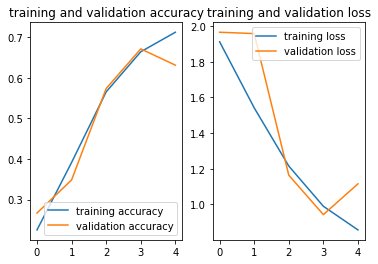

In [14]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc,label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title("training and validation accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation loss')
plt.title("training and validation loss")
plt.legend()
plt.show()